# Gaussian process

This notebook demonstrates the use of Gaussian Process Regression (GPR) for modeling and predicting a synthetic dataset. The steps include:

1. **Synthetic Data Generation**:
    - A true generative function `f(x) = x * sin(x)` is defined and plotted.
    - A few data points are sampled from this function to serve as training data.

2. **Gaussian Process Regression (Noise-Free)**:
    - A Gaussian Process model with an RBF kernel is trained on the noise-free training data.
    - The model's predictions, along with a 95% confidence interval, are plotted against the true function.

3. **Gaussian Process Regression (With Noise)**:
    - Noise is added to the training data to simulate real-world scenarios.
    - The Gaussian Process model is retrained, incorporating the noise variance using the `alpha` parameter.
    - Predictions and confidence intervals are plotted for the noisy dataset.

The notebook provides a clear visualization of how Gaussian Processes can model data with and without noise, showcasing their flexibility and predictive power.


In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate synthetic dataset

x = np.linspace(start=0.001, stop=10, num=1000).reshape(-1, 1)
y = np.squeeze(x * np.sin(x))

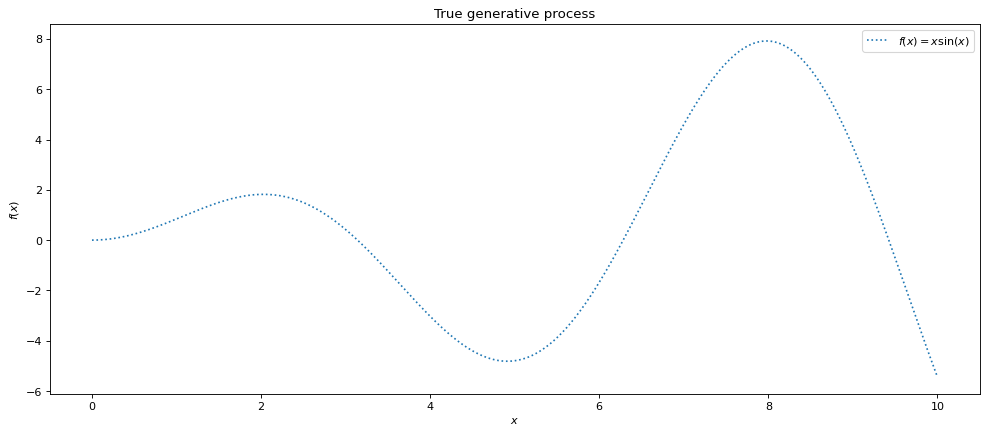

In [3]:
# plot synthetic true function

plt.figure(figsize=(15,6), dpi=80)
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

Example without noise

In [4]:
# select a few data points to train on
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=4, replace=False)
x_train, y_train = x[training_indices], y[training_indices]

In [5]:
# train the gaussian process with RBF kerne
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=5.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

5.71**2 * RBF(length_scale=1.82)

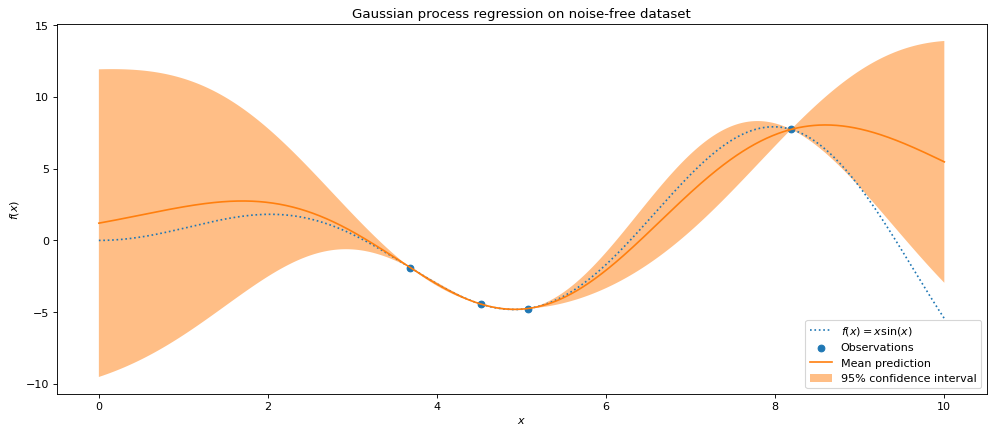

In [6]:
# get prediction and plot them
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)
plt.figure(figsize=(15,6), dpi=80)
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(x_train, y_train, label="Observations")
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

Example with noise

In [7]:
# add noise
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [8]:
# train again but this time utilizing alpha parameter which could be interpreted as the variance of the gaussian noise
gaussian_process = GaussianProcessRegressor( kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)

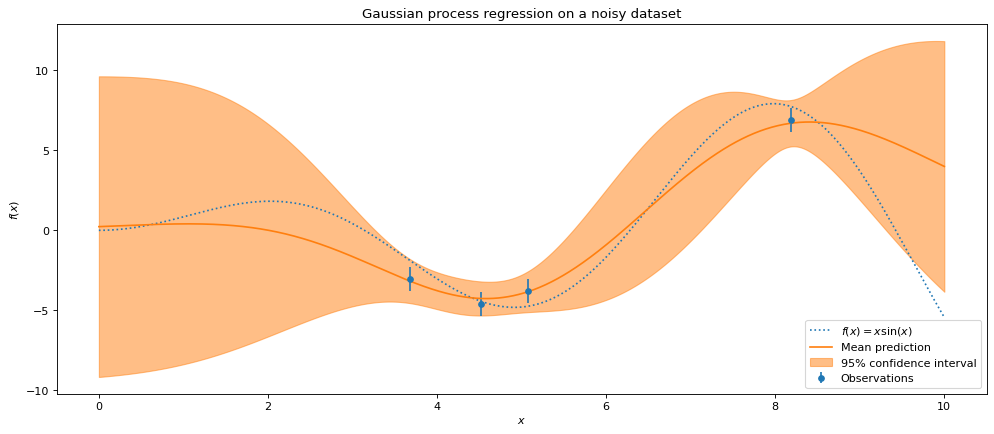

In [9]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(x, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    x_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(x, mean_prediction, label="Mean prediction")
plt.fill_between(
    x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")